# Get Data from files and help to make a breastcancer diagnosis

This litte coding example will show you the basics of data science with python.
First we will add imports we need to import, shape and display our data:

We will import [**numpy**](http://www.numpy.org/), [**Pandas**](https://pandas.pydata.org/)  and [**matplotlib**](https://matplotlib.org). With this libaries we will be able to handle arrays, load data into our project, shape them to the state we need and plot graphics helping us to understand what this numbers mean basically.

Ok let us import this libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec

#### Load the dataset

Next step will be to load a dataset this dataset is from https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/. 
This page is offering a lot of datasets for training or playing with it and learning data science and machine learning.

In [2]:
df = pd.read_csv("breast-cancer.csv", delimiter=',')

#### Check the Dataset

It seems that there is no headline in the dataset, so there are missing important information. We have to go to the [**site**](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer) we loaded the Dataset and get the headline from the documentation how it looks like this moment.

1. Class: no-recurrence-events, recurrence-events 
2. age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99. 
3. menopause: lt40, ge40, premeno. 
4. tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59. 
5. inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39. 
6. node-caps: yes, no. 
7. deg-malig: 1, 2, 3. 
8. breast: left, right. 
9. breast-quad: left-up, left-low, right-up, right-low, central. 
10. irradiat: yes, no.

So now lets add this headline to our dataset:

In [3]:
df=pd.DataFrame(df.values, columns = ["class","age","menopause", "tumor-size","inv-nodes","node-caps","deg-malig","breast","breast-quad","irradiat"])


#### Generate csv with corrected Data

In [4]:
df.to_csv("breast-cancer-head-line.csv", sep=',')
df = pd.read_csv("breast-cancer-head-line.csv", delimiter=',', index_col=0)

#### Generate an exel from the Data to offer this to 'non developer'

In [5]:
df.to_excel("breast-cancer-head-line.xls", sheet_name="data")

#### Get first entries for our data

In [6]:
df.head(5)

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


#### Get an first overview about the Data

In [7]:
df.shape

(285, 10)

In [8]:
df.describe(include = 'all')

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
count,285,285,285,285,285,285,285.000000,285,285,285
unique,2,6,3,11,7,3,NaN,2,6,2
top,no-recurrence-events,50-59,premeno,30-34,0-2,no,NaN,left,left_low,no
freq,200,96,149,59,212,221,NaN,151,109,217
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.045614,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.737351,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN


## matplotlib

Now we start to use matplotlib. The idea is to give our data informative graphics to understand it better. First we need to konfigurate the shape of our graphics as well as the size and colour.


In [9]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16.0, 8.0)

#### First Figure 

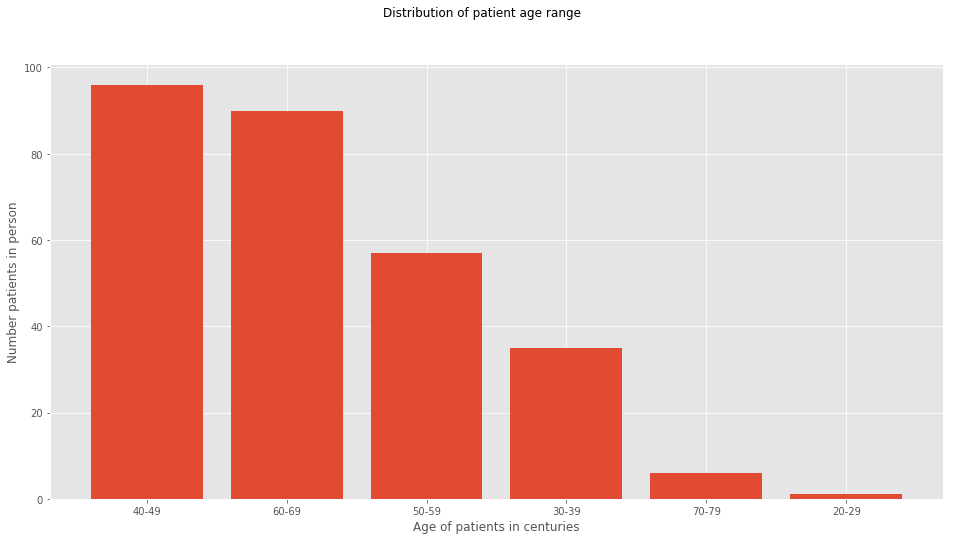

In [10]:
plt.bar(x=df.age.unique(), height=df.age.value_counts())
plt.xlabel('Age of patients in centuries')
plt.ylabel('Number patients in person')
plt.suptitle('Distribution of patient age range');

#### Shaping datasets for plotting it

Before we could start with displaying the data in different plots, we have to change it to a numeric writing. Because string is not supported by matplotlib diagramms.

1. Class: no-recurrence-events = **0**, recurrence-events = **1** 

2. age: 10-19 = **10**, 20-29 = **20**, 30-39 = **30**, 40-49 = **40**, 50-59 = **50**, 60-69 = **60**, 70-79 = **70**, 80-89 = **80**, 90-99 = **90**.

3. menopause: lt40 = **0**, ge40 = **1**, premeno = **2**. 

4. tumor-size: 0-4 = **0**, 5-9 = **5**, 10-14 = **10**, 15-19 = **15**, 20-24 = **20**, 25-29 = **25**, 30-34 = **30**, 35-39 = **35**, 40-44 = **40**, 45-49 = **45**, 50-54 = **50**, 55-59 = **55**.

5. inv-nodes: 0-2 = **0**, 3-5 = **3**, 6-8 = **6**, 9-11 = **9**, 12-14 = **12**, 15-17 = **15**, 18-20 = **18**, 21-23 = **21**, 24-26 = **24**, 27-29 = **27**, 30-32 = **30**, 33-35 = **33**, 36-39 = **36**. 

6. node-caps: yes = **1**, no = **0**. 

7. deg-malig: 1, 2, 3. 

8. breast: left = **0**, right = **1**. 

9. breast-quad: left-up = **0**, left-low = **1**, right-up = **2**, right-low = **3**, central = **4**. 

10. irradiat: yes = **1**, no = **0**.

Legend: lt40 means menopause before 40 years old
ge40 means menopause after 40


In [11]:
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [12]:
#Change class
df['class'] = df['class'].map({'recurrence-events': 1, 'no-recurrence-events': 0})
df.to_csv("breast-cancer-change-class.csv", sep=',', index=False)
df = pd.read_csv("breast-cancer-change-class.csv", delimiter=',')
df.dtypes
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,0,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,0,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,0,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,0,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [13]:
#Change Age 
df['age'] = df['age'].map({'10-19': 10, '20-29': 20, '30-39': 30, '40-49': 40, '50-59': 50, '60-69': 60, '70-79': 70, '80-89': 80, '90-99': 90})
df.to_csv("breast-cancer-change-age.csv", sep=',', index=False)
df = pd.read_csv("breast-cancer-change-age.csv", delimiter=',')
df.dtypes
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,40,premeno,20-24,0-2,no,2,right,right_up,no
1,0,40,premeno,20-24,0-2,no,2,left,left_low,no
2,0,60,ge40,15-19,0-2,no,2,right,left_up,no
3,0,40,premeno,0-4,0-2,no,2,right,right_low,no
4,0,60,ge40,15-19,0-2,no,2,left,left_low,no


In [14]:
#Change Menopause
df['menopause'] = df['menopause'].map({'lt40': 0, 'ge40': 1, 'premeno': 2})
df.to_csv("breast-cancer-change-menopause.csv", sep=',', index=False)
df = pd.read_csv("breast-cancer-change-menopause.csv", delimiter=',')
df.dtypes
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,40,2,20-24,0-2,no,2,right,right_up,no
1,0,40,2,20-24,0-2,no,2,left,left_low,no
2,0,60,1,15-19,0-2,no,2,right,left_up,no
3,0,40,2,0-4,0-2,no,2,right,right_low,no
4,0,60,1,15-19,0-2,no,2,left,left_low,no


In [15]:
#Change Tumor Size
df['tumor-size'] = df['tumor-size'].map({'0-4': 0, '5-9': 5, '10-14': 10, '15-19': 15, '20-24': 20, '25-29': 25, '30-34': 30, '35-39': 35, '40-44': 40, '45-49': 45, '50-54': 50, '55-59': 55})
df.to_csv("breast-cancer-change-tumor-size.csv", sep=',', index=False)
df = pd.read_csv("breast-cancer-change-tumor-size.csv", delimiter=',')
df.dtypes
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,40,2,20,0-2,no,2,right,right_up,no
1,0,40,2,20,0-2,no,2,left,left_low,no
2,0,60,1,15,0-2,no,2,right,left_up,no
3,0,40,2,0,0-2,no,2,right,right_low,no
4,0,60,1,15,0-2,no,2,left,left_low,no


In [16]:
#Change inv-nodes
df['inv-nodes'] = df['inv-nodes'].map({'0-2': 0, '3-5': 3, '6-8': 6, '9-11': 9, '12-14': 12, '15-17': 15, '18-20': 18, '21-23': 21, '24-26': 24, '27-29': 27, '30-32': 30, '33-35': 33, '36-39': 36})
df.to_csv("breast-cancer-change-inv-nodes.csv", sep=',', index=False)
df = pd.read_csv("breast-cancer-change-inv-nodes.csv", delimiter=',')
df.dtypes
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,40,2,20,0,no,2,right,right_up,no
1,0,40,2,20,0,no,2,left,left_low,no
2,0,60,1,15,0,no,2,right,left_up,no
3,0,40,2,0,0,no,2,right,right_low,no
4,0,60,1,15,0,no,2,left,left_low,no


In [17]:
#Change node-caps
df['node-caps'] = df['node-caps'].map({'yes': 1, 'no': 0})
df.to_csv("breast-cancer-change-node-caps.csv", sep=',', index=False)
df = pd.read_csv("breast-cancer-change-node-caps.csv", delimiter=',')
df.dtypes
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,40,2,20,0,0.0,2,right,right_up,no
1,0,40,2,20,0,0.0,2,left,left_low,no
2,0,60,1,15,0,0.0,2,right,left_up,no
3,0,40,2,0,0,0.0,2,right,right_low,no
4,0,60,1,15,0,0.0,2,left,left_low,no


In [18]:
#Change breast
df['breast'] = df['breast'].map({'right': 1, 'left': 0})
df.to_csv("breast-cancer-change-breast.csv", sep=',', index=False)
df = pd.read_csv("breast-cancer-change-breast.csv", delimiter=',')
df.dtypes
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,40,2,20,0,0.0,2,1,right_up,no
1,0,40,2,20,0,0.0,2,0,left_low,no
2,0,60,1,15,0,0.0,2,1,left_up,no
3,0,40,2,0,0,0.0,2,1,right_low,no
4,0,60,1,15,0,0.0,2,0,left_low,no


In [19]:
#change irradiat
df['irradiat'] = df['irradiat'].map({'yes': 1, 'no': 0})
df.to_csv("breast-cancer-change-irradiat.csv", sep=',', index=False)
df = pd.read_csv("breast-cancer-change-irradiat.csv", delimiter=',')
df.dtypes
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,40,2,20,0,0.0,2,1,right_up,0
1,0,40,2,20,0,0.0,2,0,left_low,0
2,0,60,1,15,0,0.0,2,1,left_up,0
3,0,40,2,0,0,0.0,2,1,right_low,0
4,0,60,1,15,0,0.0,2,0,left_low,0


In [20]:
df.describe(include = 'all')

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
count,285.000000,285.000000,285.000000,285.000000,285.000000,277.000000,285.000000,285.000000,285,285.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_low,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109,NaN
mean,0.298246,46.701754,1.498246,24.385965,1.578947,0.202166,2.045614,0.470175,NaN,0.238596
std,0.458293,10.087583,0.547880,10.542928,3.456711,0.402342,0.737351,0.499988,NaN,0.426975
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000
25%,0.000000,40.000000,1.000000,20.000000,0.000000,0.000000,2.000000,0.000000,NaN,0.000000
50%,0.000000,50.000000,2.000000,25.000000,0.000000,0.000000,2.000000,0.000000,NaN,0.000000
75%,1.000000,50.000000,2.000000,30.000000,3.000000,0.000000,3.000000,1.000000,NaN,0.000000


In [21]:
df.dtypes

class            int64
age              int64
menopause        int64
tumor-size       int64
inv-nodes        int64
node-caps      float64
deg-malig        int64
breast           int64
breast-quad     object
irradiat         int64
dtype: object

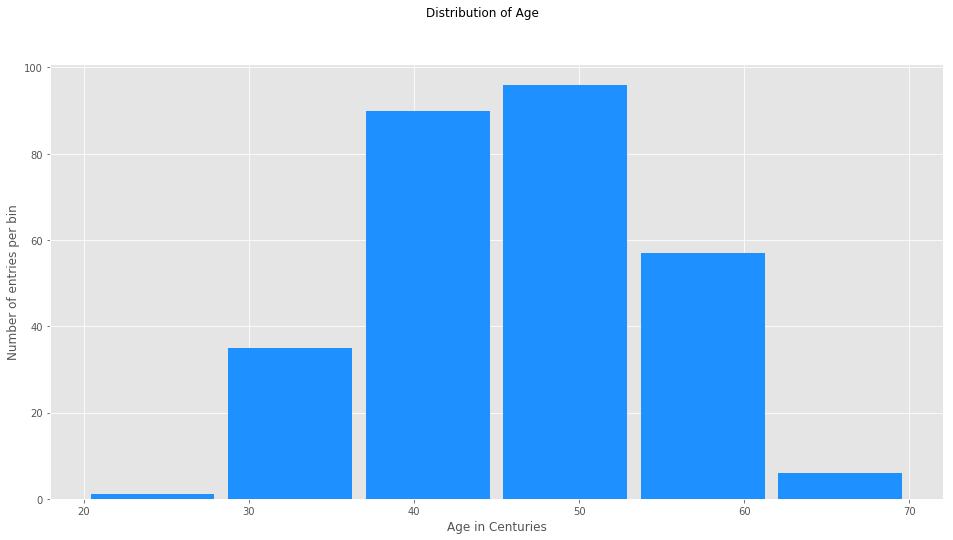

In [22]:
plt.suptitle("Distribution of Age")
plt.hist(df['age'], 
         bins=6, 
         rwidth=0.9, 
         density = False, 
         color='dodgerblue')
plt.xlabel('Age in Centuries')
plt.ylabel('Number of entries per bin');

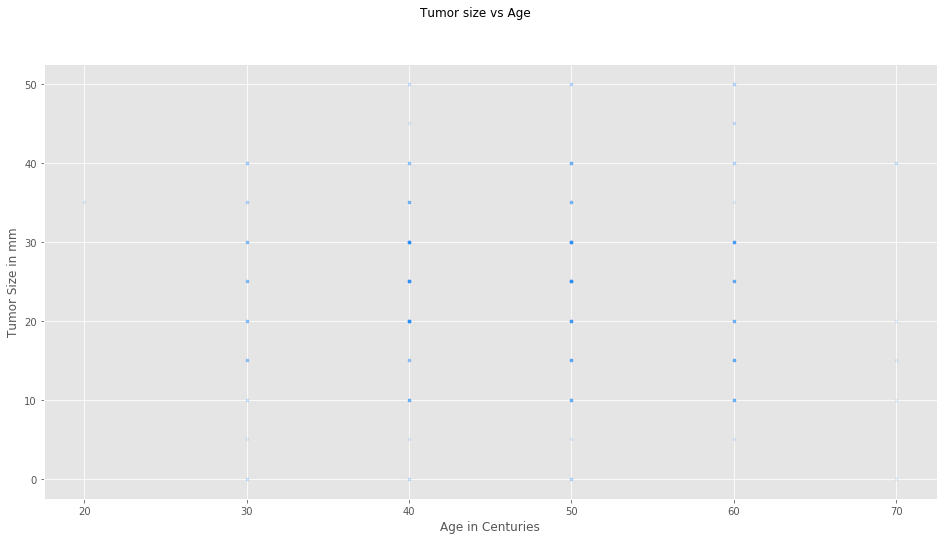

In [23]:
plt.suptitle("Tumor size vs Age")
plt.scatter(x=df[df['tumor-size'] < 90]['age'], 
            y=df[df['tumor-size'] < 70]['tumor-size'], 
            marker='.', 
            alpha=0.1, 
            color='dodgerblue')
plt.xlabel('Age in Centuries')
plt.ylabel('Tumor Size in mm');

#### Information from a different display

Lets have a look if we can get more information if we use a heat map instead of a scatter plot. Let us do a heatmap. If the heatmap is done, I would like the answer for the following questions:

Do you think there are usefull information we could use for machine learning Training ?

Do you think there is somehow a "risk group" ?

If there is a risk group, how would you think could it be described?

What would you recommend when precautionary investigation be more intense?

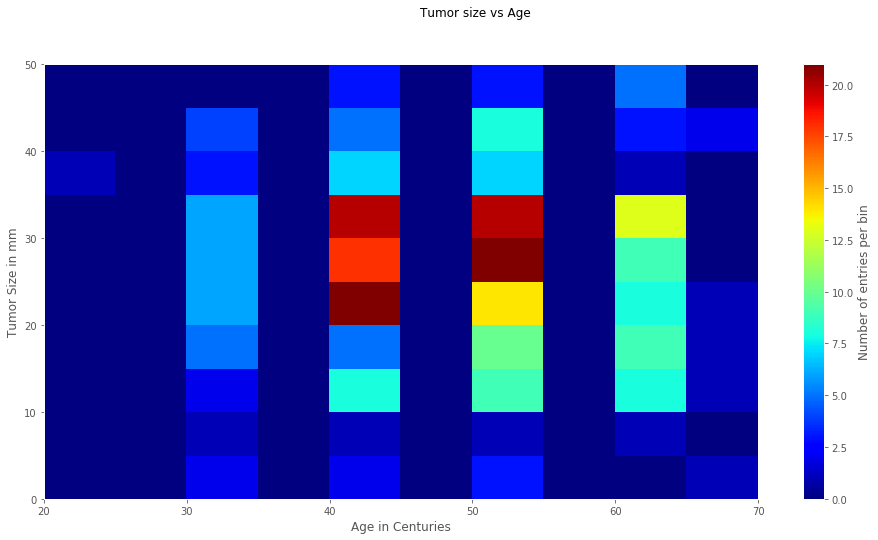

In [24]:
plt.suptitle("Tumor size vs Age")
plt.hist2d(x=df[df['tumor-size'] < 60]['age'], 
           y=df[df['tumor-size'] < 70]['tumor-size'], 
           bins=10, 
           cmap=mpl.cm.jet)
plt.xlabel('Age in Centuries')
plt.ylabel('Tumor Size in mm');
cb = plt.colorbar()
cb.set_label('Number of entries per bin')

In [25]:
df.dtypes

class            int64
age              int64
menopause        int64
tumor-size       int64
inv-nodes        int64
node-caps      float64
deg-malig        int64
breast           int64
breast-quad     object
irradiat         int64
dtype: object

#### Find additional information:

We now have found out an information wich seems obvious. But with the knowledge we gained, we can use other parameters to let them correlate as well.

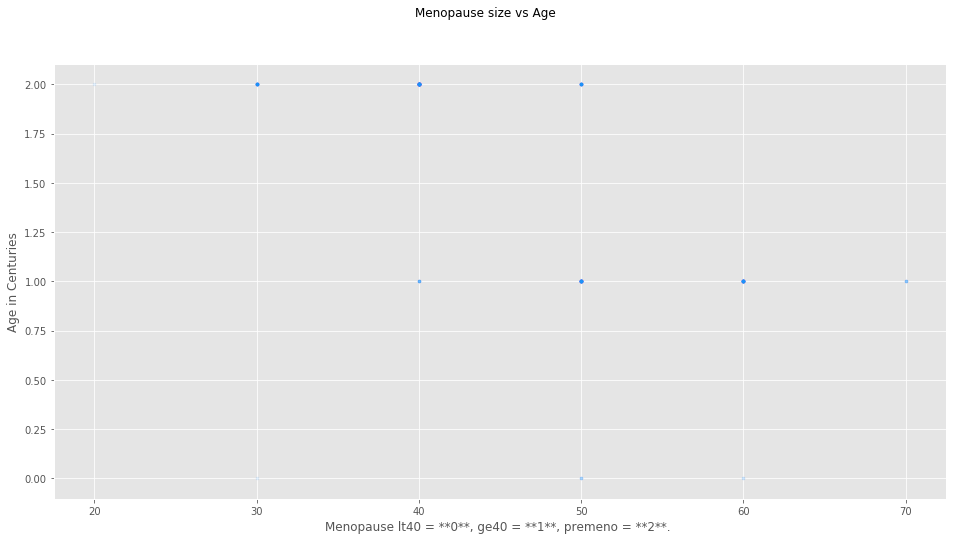

In [26]:
plt.suptitle("Menopause size vs Age")
plt.scatter(x=df[df['menopause'] < 3]['age'], 
            y=df[df['menopause'] < 3]['menopause'], 
            marker='.', 
            alpha=0.1, 
            color='dodgerblue')
plt.xlabel('Menopause lt40 = **0**, ge40 = **1**, premeno = **2**. ')
plt.ylabel('Age in Centuries');

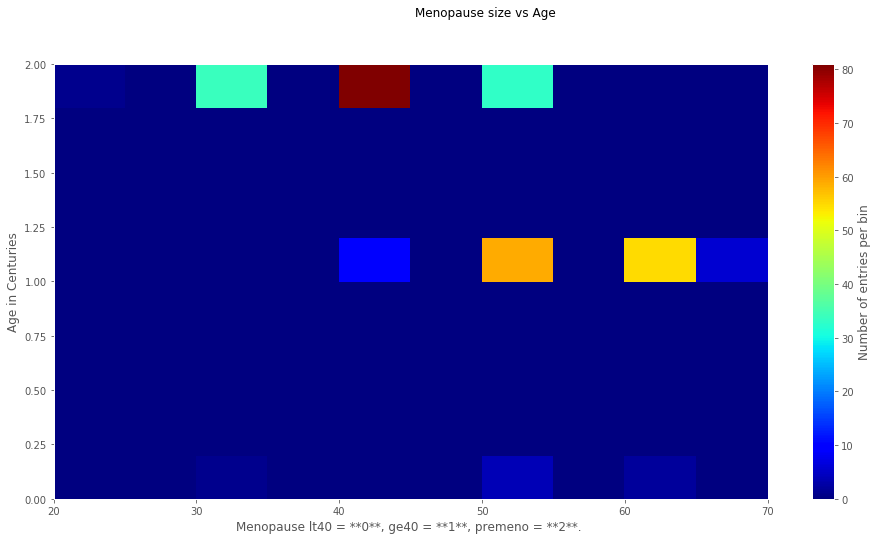

In [27]:
plt.suptitle("Menopause size vs Age")
plt.hist2d(x=df[df['menopause'] < 90]['age'], 
           y=df[df['menopause'] < 3]['menopause'], 
           bins=10, 
           cmap=mpl.cm.jet)
plt.xlabel('Menopause lt40 = **0**, ge40 = **1**, premeno = **2**. ')
plt.ylabel('Age in Centuries');
cb = plt.colorbar()
cb.set_label('Number of entries per bin')

#### Eveluation information

Does this grafic give us any usefull (cancer relatet) information?

If yes what kind ? If no why?

#### Different approach

Maybe if we take an other dimension, it will get more clear what we are searchin for.

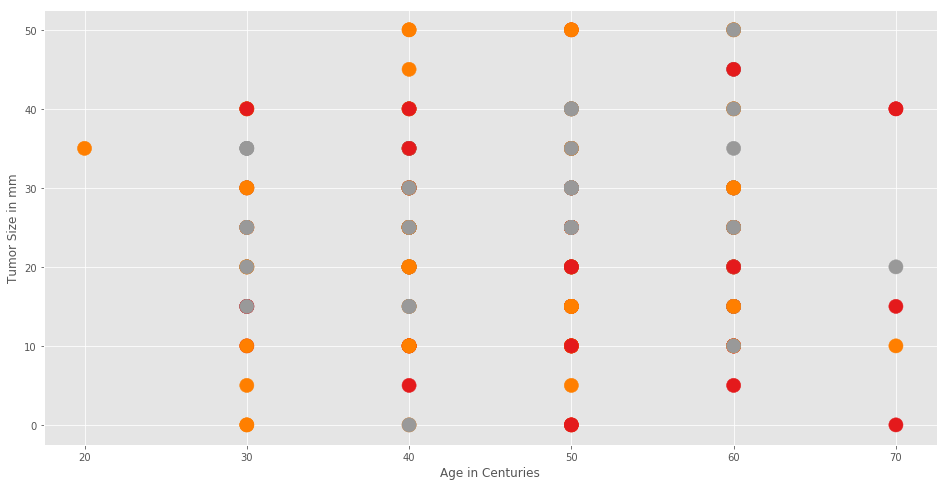

In [28]:
# 'age'
# 'sepal width (cm)'
feature_A = 'age'
feature_B = 'tumor-size'
plt.scatter(
    df[feature_A],
    df[feature_B],
    c=df['deg-malig'],# 'third axis' = color
    cmap='Set1',   # colormap
    s=200,          # dot size
);
plt.xlabel("Age in Centuries")
plt.ylabel("Tumor Size in mm");

Covariance matrix
 [[ 97.84734645   1.41621944]
 [  1.41621944 119.80471079]]


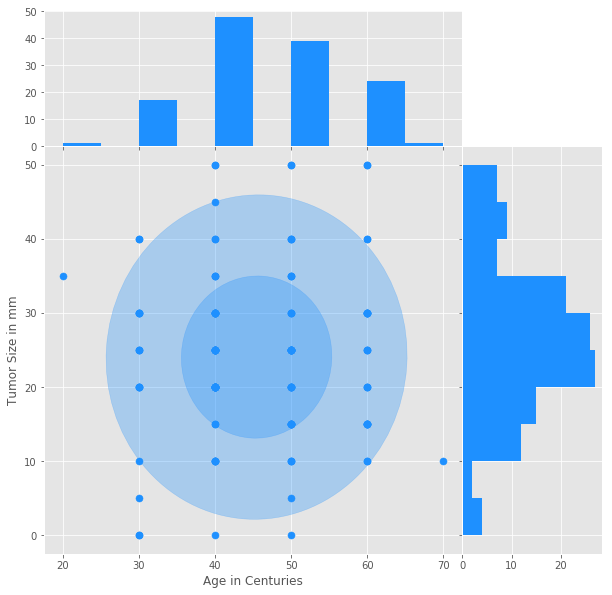

In [29]:
x = df[df['deg-malig'] == 2]['age']
y = df[df['deg-malig'] == 2]['tumor-size']

# 2x2 grid
plt.figure(figsize=(10, 10))
gs1 = gridspec.GridSpec(2, 2, height_ratios=[1, 3], width_ratios=[3, 1])
gs1.update(wspace=0.0, hspace=0.0)

# scatter plot
ax2 = plt.subplot(gs1[2])
ax2.scatter(x, y ,s=50, color='dodgerblue')
ax2.set_xlabel('Age in Centuries')
ax2.set_ylabel('Tumor Size in mm')

# upper histogramm
ax0 = plt.subplot(gs1[0], sharex=ax2)
ax0.hist(x, color='dodgerblue')
plt.setp( ax0.get_xticklabels(), visible=False)

# right histogramm
ax3 = plt.subplot(gs1[3], sharey=ax2)
ax3.hist(y, orientation='horizontal', color='dodgerblue')
plt.setp( ax3.get_yticklabels(), visible=False)

# Calculaitng the parameters of the correlation matrices
eigenvectors = np.linalg.eig(np.cov(x, y))
print('Covariance matrix\n', np.cov(x, y))
ev = eigenvectors[0]
ex = eigenvectors[1][0]
ey = eigenvectors[1][1]

angle = np.arctan(ey[0] / ey[1]) / np.pi * 180

# Draw ellipses
ax2.add_artist(
    mpl.patches.Ellipse(xy=(x.mean(), y.mean()),
                        width=2 * np.sqrt(ev[0]),
                        height=2 * np.sqrt(ev[1]),
                        angle=angle,
                        color='dodgerblue',
                        alpha=0.30))
ax2.add_artist(
    mpl.patches.Ellipse(xy=(x.mean(), y.mean()),
                        width=2 * 2 * np.sqrt(ev[0]),
                        height=2 * 2 * np.sqrt(ev[1]),
                        angle=angle,
                        color='dodgerblue',
                        alpha=0.30));

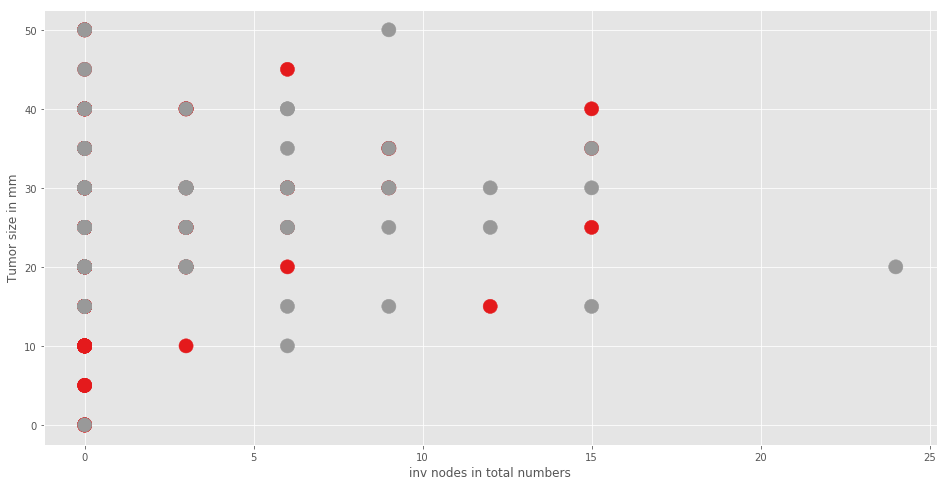

In [30]:
# 'age'
# 'class'
feature_A = 'inv-nodes'
feature_B = 'tumor-size'
plt.scatter(
    df[feature_A],
    df[feature_B],
    c=df['class'],# 'third axis' = color
    cmap='Set1',   # colormap
    s=200,          # dot size
);
plt.xlabel("inv nodes in total numbers")
plt.ylabel("Tumor size in mm");